In [1]:
from desc.backend import jnp, jit
import matplotlib.pyplot as plt
from jax.experimental.ode import odeint

DESC version 0+untagged.6649.g3758b95.dirty,using JAX backend, jax version=0.4.14, jaxlib version=0.4.14, dtype=float64
Using device: CPU, with 1.37 GB available memory


In [2]:
def system(y, t, a):
    #lorentz system
    sigma, rho, beta = a
    x, y, z = y
    return jnp.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])

In [3]:
def Runge_Kutta(f, y0, t, a):
    # Runge-Kutta 4th order
    n = len(t)
    y = jnp.zeros((n, len(y0)))
    y = y.at[0].set(y0)
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], a)
        k2 = f(y[i] + h * k1 / 2, t[i] + h / 2, a)
        k3 = f(y[i] + h * k2 / 2, t[i] + h / 2, a)
        k4 = f(y[i] + h * k3, t[i] + h, a)
        y = y.at[i + 1].set(y[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return y

In [4]:
%time sol_jit = Runge_Kutta(jit(system), jnp.array([1, 1, 1]), jnp.linspace(0, 100, 5000), jnp.array([10, 28, 8/3]))
# %time sol = Runge_Kutta(system, jnp.array([1, 1, 1]), jnp.linspace(0, 100, 1000), jnp.array([10, 28, 8/3]))
# %time sol_odeint = odeint(system, jnp.array([1, 1, 1]), jnp.linspace(0, 100, 1000), jnp.array([10, 28, 8/3]))

CPU times: user 32.2 s, sys: 6 ms, total: 32.2 s
Wall time: 32.2 s


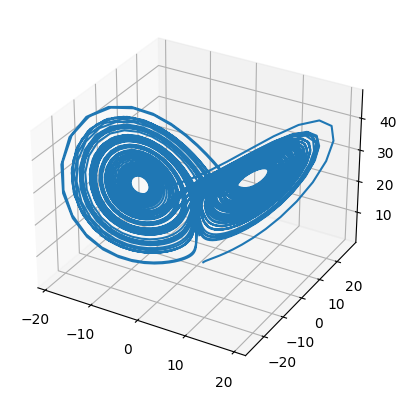

In [7]:
t = jnp.linspace(0, 100, 1000)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol_jit[:, 0], sol_jit[:, 1], sol_jit[:, 2])